# **Hand Written Digit Prediction**

-------------

## **Objective**

The objective is to train a machine learning model (Random Forest Classifier) to predict handwritten digits from the MNIST dataset. The MNIST dataset consists of grayscale images of handwritten digits (0 through 9) and is a common dataset for digit recognition tasks.

## **Data Source**

I am using the scikit-learn built-in dataset called "load_digits," which is similar to MNIST but smaller and easier to work with. This dataset contains 8x8 pixel images of handwritten digits along with their corresponding labels.

## **Import Library**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Import Data**

In [5]:
from sklearn.datasets import load_digits
df = load_digits()

## **Describe Data**

I have used "Digits" dataset, which is similar to the MNIST dataset but smaller. This dataset contains grayscale images of handwritten digits (0 through 9) and their corresponding labels.

Each data point in the dataset is an 8x8 pixel grayscale image of a handwritten digit. These images are represented as 2D arrays where each pixel's value corresponds to the grayscale intensity. The values range from 0 (black) to 16 (white), as you've normalized them in your code.

Each image is associated with a label (target variable) indicating the digit it represents. The labels are integers from 0 to 9, corresponding to the digits 0 through 9.

The dataset contains a total of 1,797 samples, each with an associated image and label.

I split the dataset into training and testing sets using train_test_split with a 70/30 split ratio. This is to evaluate the model's performance.

I also normalized the pixel values by dividing them by 16. This scales the pixel values to a range between 0 and 1, making it easier for the machine learning model to work with.



## **Data Visualization**

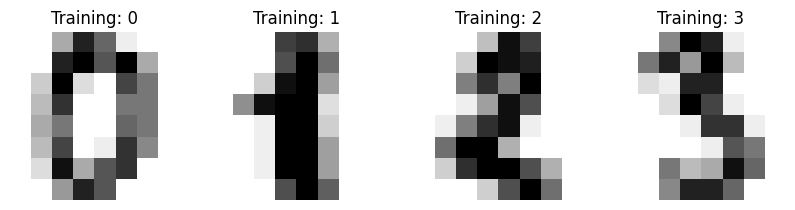

In [7]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
  ax.set_title("Training: %i" % label)

## **Data Preprocessing**

In [9]:
df.images.shape

(1797, 8, 8)

In [10]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
df.images[0].shape

(8, 8)

In [18]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [19]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [20]:
print(data.min())
print(data.max())
data = data/16
print(data.min())
print(data.max())
data[0]

0.0
16.0
0.0
1.0


array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split and Define Target Variable (y) and Feature Variables (X)**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(data, df.target, test_size = 0.3)

In [24]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

## **Prediction**

In [29]:
Y_pred = rf.predict(X_test)
print(Y_pred)

[9 5 1 5 6 2 8 7 4 3 1 7 4 0 3 2 8 8 9 5 2 1 3 1 6 8 3 3 3 8 4 3 2 1 7 1 4
 4 2 5 8 8 2 8 9 9 7 5 9 8 4 8 3 0 0 1 9 7 4 6 8 9 0 7 3 1 7 1 4 8 3 3 7 1
 2 2 2 8 4 8 7 3 6 0 7 7 4 6 3 5 0 3 6 4 0 9 5 2 9 8 1 6 8 3 1 1 2 5 3 1 2
 0 1 3 6 1 3 6 9 6 7 3 5 7 7 2 8 7 7 7 2 7 6 9 2 5 4 3 4 2 6 1 4 4 1 7 3 0
 2 3 7 7 5 7 0 8 5 8 3 8 8 1 5 1 4 5 8 5 0 0 9 6 0 2 7 7 5 6 0 2 8 3 1 6 8
 9 0 9 7 9 1 2 5 7 8 6 2 0 7 7 4 1 6 4 1 8 4 6 3 5 8 8 0 9 4 1 7 8 2 9 6 6
 1 3 1 6 5 5 5 4 0 5 3 1 3 5 4 1 4 7 6 8 9 6 4 3 1 2 3 5 0 1 7 5 8 3 5 2 3
 0 4 3 6 6 1 6 2 2 9 6 7 2 4 4 2 5 2 6 5 9 6 8 4 9 0 1 6 8 8 8 7 3 7 3 0 9
 6 8 8 3 7 4 3 3 8 4 8 3 5 8 9 3 4 7 7 8 7 0 9 1 1 3 3 4 4 7 7 1 8 0 2 5 4
 8 1 0 5 0 8 0 6 8 1 1 9 1 6 2 1 3 3 0 7 2 1 8 0 5 3 0 9 3 8 3 7 9 5 1 9 8
 1 8 4 4 7 7 7 4 4 8 6 9 8 4 9 6 9 9 4 5 8 5 1 6 2 0 2 4 2 9 8 3 2 3 5 2 1
 0 7 7 7 8 1 0 2 4 4 5 7 5 5 8 3 0 6 3 5 4 3 7 1 5 9 9 4 6 7 0 0 1 2 5 9 9
 6 0 1 6 9 7 8 2 7 5 2 0 9 3 2 9 1 7 0 4 7 4 6 7 9 4 2 3 0 1 3 0 0 2 6 8 1
 0 2 5 4 4 0 1 7 6 8 3 3 

## **Model Evaluation**

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(Y_test, Y_pred)

array([[47,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 60,  0,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  0, 51,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 62,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 61,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0, 45]])

In [32]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.92      1.00      0.96        58
           2       1.00      1.00      1.00        47
           3       0.97      0.98      0.98        61
           4       0.98      0.93      0.95        55
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        48
           7       0.98      1.00      0.99        62
           8       0.98      0.95      0.97        64
           9       0.98      0.96      0.97        47

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



## **Explaination**

I loaded the digits dataset using the load_digits function and stored it in the variable df.

I then created a 1x4 grid of subplots for visualizing the first four images from the dataset.

I determined the number of samples in the dataset by calculating the length of df.images.

I reshaped the images using .reshape to convert them from 2D images (8x8) to 1D arrays, which is a more suitable format for machine learning models.

I further normalized the data by dividing it by 16 to scale the pixel values between 0 and 1.

I split the data into training and testing sets using train_test_split from scikit-learn. I allocated 70% of the data for training and 30% for testing.

I initialized a Random Forest Classifier (RandomForestClassifier) and trained it using the training data.

I made predictions on the testing data using the trained model and stored the predictions in Y_pred.

I used functions: confusion_matrix and classification_report, to calculate and print a confusion matrix and a classification report, which provided detailed performance metrics for your model.